In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

### 군집 알고리즘 비교와 평가

#### 타겟값으로 군집 평가
 - ARI / NMI : 군집이 최적일 때 점수를 1로주고, 군집이 무작위로 분류될 경우 0을 줌
 
** ARI 점수는 음수로 나올수 있음

In [2]:
from sklearn.metrics.cluster import adjusted_rand_score

In [30]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [31]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [32]:
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

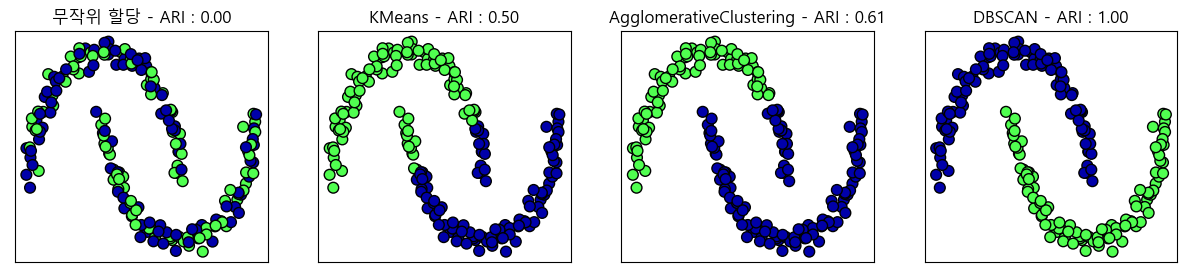

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                         subplot_kw={"xticks":(), "yticks":()})

# 분집군석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2, size=(len(x_scaled)))

axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors="black")
axes[0].set_title("무작위 할당 - ARI : {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0],x_scaled[:,1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors="black")
    ax.set_title("{} - ARI : {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [34]:
from sklearn.metrics import accuracy_score

cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

accuracy_score(cluster1, cluster2)

0.0

In [35]:
adjusted_rand_score(cluster1, cluster2)

1.0

#### 실루엣 지수
 - 클러스터의 밀집도를 계산
 - 데이터가 복잡할 떄는 밀집도를 활용한 점수가 잘 안맞음
 - -1 완전 잘못된 군집, 0 중첩된 군집, 1 잘 구분된 군집 

In [36]:
from sklearn.metrics.cluster import silhouette_score

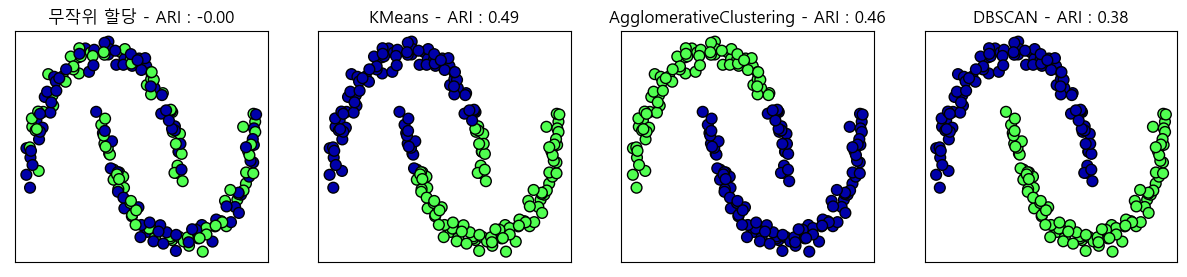

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                         subplot_kw={"xticks":(), "yticks":()})

# 분집군석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2, size=(len(x_scaled)))

axes[0].scatter(x_scaled[:,0], x_scaled[:,1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors="black")
axes[0].set_title("무작위 할당 - ARI : {:.2f}".format(
    silhouette_score(x_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0],x_scaled[:,1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors="black")
    ax.set_title("{} - ARI : {:.2f}".format(algorithm.__class__.__name__,
                                           silhouette_score(x_scaled, clusters)))